<a href="https://colab.research.google.com/github/AkshatMadhani/NEWS_CLASSIFIER/blob/main/News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df= pd.read_csv('train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df=df.dropna()
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
message=df.copy()
message

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
corpus=[]
ps=PorterStemmer()


In [ ]:
message.reset_index(inplace=True)

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0,message.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=message.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()

In [ ]:
y=message['label']

In [ ]:
x.shape

(18285, 5000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2040
           1       0.87      0.91      0.89      1617

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

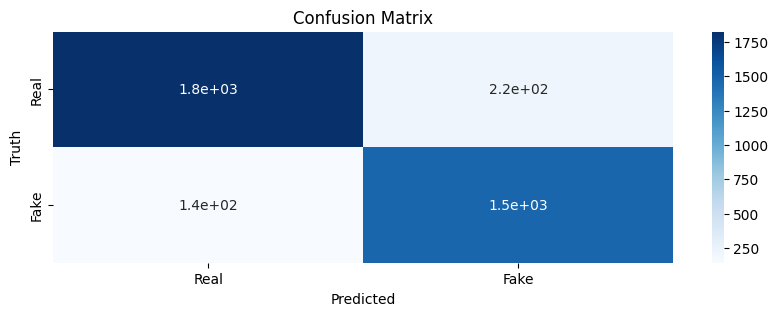

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  new_classifier = MultinomialNB(alpha=i)
  new_classifier.fit(x_train, y_train)
  temp_y_pred = new_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))




Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)


MultinomialNB(alpha=0.1)

In [ ]:
import pickle
pickle.dump(classifier,open('news.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))


In [ ]:

def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)


In [ ]:
df1=pd.read_csv('test.csv')
df1

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [ ]:
df1.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [ ]:
import random
from random import randint
news_title=df1['title']
news_title.shape


(5200,)

In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Why Success Comes in Waves · Guardian Liberty Voice
The news is real


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:North Korea Threatens ’Super-Mighty Preemptive Strike’ to Reduce America to ’Ashes’
The news is real


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Review: Lemony Snicket’s Creations, in a Cloud of Marvelous Gloom - The New York Times
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Now, Dennis Hastert Seems an Architect of Dysfunction as Speaker - The New York Times
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Trump Will Beat Hillary With These Tricks
The news is real


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:#LoudonClear: Tonight’s Special Guest Tim Burton
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Video: Doctors Who Discovered Cancer Enzymes In Vaccines All Found Murdered
The news is real


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:А не стоит ли оставить США наедине со своими «избранными представителями» | Новое восточное обозрение
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Renuncian a llevar a su hijo a la escuela porque quieren educarlo en Forocoches
The news is real


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Review: On ‘The Good Fight,’ a Lawyer Claws Her Way Back to Normal - The New York Times
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Trump to Host Passover Seder in Washington on Monday Night
The news is fake


In [ ]:
row=randint(0,news_title.shape[0]-1)
sample_news=news_title[row]
print("News:{}".format(sample_news))
if fake_news(sample_news):
  print('The news is real')
else:
  print('The news is fake')

News:Temas clave siguen lejos de resolverse en el deshielo Cuba-EEUU
The news is real
